In [1]:
import pandas as pd

df = pd.read_csv('possum.csv')
df.head()

case  site  Pop sex  age  hdlngth  skullw  totlngth  taill  footlgth  \
0     1     1  Vic   m  8.0     94.1    60.4      89.0   36.0      74.5   
1     2     1  Vic   f  6.0     92.5    57.6      91.5   36.5      72.5   
2     3     1  Vic   f  6.0     94.0    60.0      95.5   39.0      75.4   
3     4     1  Vic   f  6.0     93.2    57.1      92.0   38.0      76.1   
4     5     1  Vic   f  2.0     91.5    56.3      85.5   36.0      71.0   

   earconch   eye  chest  belly  
0      54.5  15.2   28.0   36.0  
1      51.2  16.0   28.5   33.0  
2      51.9  15.5   30.0   34.0  
3      52.2  15.2   28.0   34.0  
4      53.2  15.1   28.5   33.0

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104 entries, 0 to 103
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   case      104 non-null    int64  
 1   site      104 non-null    int64  
 2   Pop       104 non-null    object 
 3   sex       104 non-null    object 
 4   age       102 non-null    float64
 5   hdlngth   104 non-null    float64
 6   skullw    104 non-null    float64
 7   totlngth  104 non-null    float64
 8   taill     104 non-null    float64
 9   footlgth  103 non-null    float64
 10  earconch  104 non-null    float64
 11  eye       104 non-null    float64
 12  chest     104 non-null    float64
 13  belly     104 non-null    float64
dtypes: float64(10), int64(2), object(2)
memory usage: 11.5+ KB


In [3]:
df.isnull().sum()

case        0
site        0
Pop         0
sex         0
age         2
hdlngth     0
skullw      0
totlngth    0
taill       0
footlgth    1
earconch    0
eye         0
chest       0
belly       0
dtype: int64

In [4]:
df['age'] = df['age'].fillna(df.age.mean())
df.age.isnull().sum()

df['footlgth'] = df['footlgth'].fillna(df.footlgth.mean())
df.footlgth.isnull().sum()

0

In [5]:
from sklearn.preprocessing import LabelEncoder

le_Pop = LabelEncoder()
le_Pop.fit(df['Pop']) 

le_sex = LabelEncoder()
le_sex.fit(df['sex']) 

df['Pop_num'] = le_Pop.transform(df['Pop']) 
df['sex_num'] = le_sex.transform(df['sex'])

In [6]:
df.drop(['Pop', 'sex'], axis=1, inplace=True)

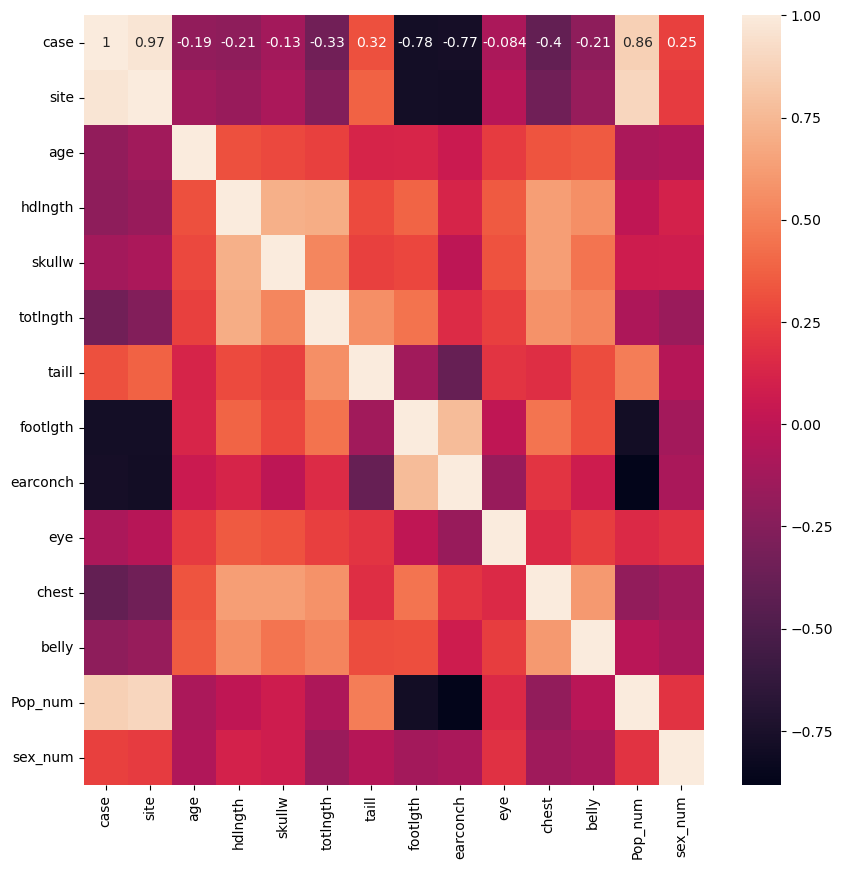

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns


plt.figure(figsize=(10,10))
sns.heatmap(df.corr(), annot=True)
plt.show()

In [8]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

X = df.drop(labels=['totlngth'], axis=1)
y = df['totlngth']

X_train, X_test , y_train , y_test = train_test_split(X, y , test_size =0.2 , random_state=0)

scaler = StandardScaler()
X_train_scaler = scaler.fit_transform(X_train)
X_test_scaler = scaler.transform(X_test)

model = LinearRegression()
model.fit(X_train_scaler, y_train)

LinearRegression()

In [10]:
y_pred_scaler = model.predict(X_test_scaler)

from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from math import sqrt

print('Intercept:', model.intercept_)
print('Coefficients', model.coef_)
print ('MSE :', round(mean_squared_error (y_pred_scaler, y_test), 2))
print ('RMSE :', round(sqrt(mean_squared_error (y_pred_scaler, y_test)), 2))
print ('MAE :', round(mean_absolute_error(y_pred_scaler, y_test), 2))

Intercept: 86.80361445783133
Coefficients [-1.96376114  0.1385616  -0.1059385   1.46028224  0.35265994  2.05884698
  1.10805926  0.03390082 -0.15985939 -0.17107638  0.06429279  1.25705597
 -0.33988354]
MSE : 6.85
RMSE : 2.62
MAE : 1.97
